In [41]:
import pandas as pd

In [42]:
df =pd.read_excel(r"C:\Users\prash\Downloads\results_2021-09-30_DA Assignment.xlsx")

In [43]:
df.head()

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02T02:32:29Z,2021-09-05T18:30:00Z,2021-08-07T13:50:21.965794Z,9393307,INMUN,2021-08-31T08:45:09.54Z
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03T03:17:16Z,2021-09-05T18:30:00Z,2021-08-07T06:24:55.229106Z,9393307,INMUN,2021-08-31T08:45:09.54Z
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04T02:53:17Z,2021-09-05T18:30:00Z,2021-08-07T20:52:36.357922Z,9393307,INMUN,2021-08-31T08:45:09.54Z
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04T23:55:04Z,2021-09-05T18:30:00Z,2021-08-08T16:25:14.146273Z,9393307,INMUN,2021-08-31T08:45:09.54Z
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06T00:33:44Z,2021-09-05T18:30:00Z,2021-08-08T15:46:31.015292Z,9393307,INMUN,2021-08-31T08:45:09.54Z


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vessel_live_info_id    6347 non-null   object
 1   timestamp_utc          6347 non-null   object
 2   scheduled_arrival_utc  6347 non-null   object
 3   estimated_arrival_utc  6347 non-null   object
 4   imo                    6347 non-null   int64 
 5   port_code              6347 non-null   object
 6   actual_arrival_utc     6347 non-null   object
dtypes: int64(1), object(6)
memory usage: 347.2+ KB


In [45]:
df['actual_arrival_utc']=pd.to_datetime(df['actual_arrival_utc'])
df['timestamp_utc']=pd.to_datetime(df['timestamp_utc'])

In [46]:
df['estimated_arrival_utc'] = pd.to_datetime(df['estimated_arrival_utc'])
df['scheduled_arrival_utc'] = pd.to_datetime(df['scheduled_arrival_utc'])


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   vessel_live_info_id    6347 non-null   object             
 1   timestamp_utc          6347 non-null   datetime64[ns, UTC]
 2   scheduled_arrival_utc  6347 non-null   datetime64[ns, UTC]
 3   estimated_arrival_utc  6347 non-null   datetime64[ns, UTC]
 4   imo                    6347 non-null   int64              
 5   port_code              6347 non-null   object             
 6   actual_arrival_utc     6347 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](4), int64(1), object(2)
memory usage: 347.2+ KB


In [48]:
df.groupby(['imo']).count()

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,port_code,actual_arrival_utc
imo,,,,,,
8918966,72,72,72,72,72,72
9064750,129,129,129,129,129,129
9078464,67,67,67,67,67,67
9110377,7,7,7,7,7,7
9123154,121,121,121,121,121,121
...,...,...,...,...,...,...
9777216,264,264,264,264,264,264
9778076,34,34,34,34,34,34
9778117,13,13,13,13,13,13


In [49]:
#Actual View
df['AV_days_ahead= ATA-ptimestamp']=df['actual_arrival_utc'].dt.date-df['timestamp_utc'].dt.date

In [50]:
df['abs(ATA-pETA)'] = (df['actual_arrival_utc']-df['estimated_arrival_utc']).abs()
import numpy as np
np.std(df['abs(ATA-pETA)'])

Timedelta('7 days 10:55:03.677593327')

In [51]:
#df['abs(ATA-STA)'] = (df['actual_arrival_utc']-df['scheduled_arrival_utc']).abs()

In [52]:
#df['abs(pETA-STA)']=(df['estimated_arrival_utc']-df['scheduled_arrival_utc']).abs()

In [53]:
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA)
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,60 days,23 days 18:54:47.574206
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,59 days,24 days 02:20:14.310894
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,58 days,23 days 11:52:33.182078
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,58 days,22 days 16:19:55.393727
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,56 days,22 days 16:58:38.524708
...,...,...,...,...,...,...,...,...,...
6342,61f2aa93-aa8b-4b4e-b827-c510f50cb773,2021-09-27 22:32:04+00:00,2021-09-23 16:00:00+00:00,2021-09-28 09:43:08.975365+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,1 days,0 days 11:08:57.134635
6343,b7092cac-ff73-46b0-90d2-fab50047d1aa,2021-09-28 00:10:03+00:00,2021-09-22 16:00:00+00:00,2021-09-28 22:00:29.220478+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,1 days,0 days 02:18:25.009522
6344,4675431b-c8e9-49c4-80a8-db87f41e6bdf,2021-09-28 04:44:10+00:00,2021-09-23 16:00:00+00:00,2021-09-28 08:32:12.671424+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,0 days,0 days 12:19:53.438576
6345,0b1f12c6-fe6f-4811-85c1-bc360f625fd2,2021-09-28 16:07:03+00:00,2021-09-22 16:00:00+00:00,2021-09-29 16:08:45.330866+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,1 days,0 days 15:49:51.100866


In [54]:
df['AV_days_ahead= ATA-ptimestamp'].sort_values()

3965   -3 days
3901   -3 days
3744   -2 days
3810   -2 days
3706   -2 days
         ...  
10     79 days
11     79 days
12     79 days
8      80 days
7      80 days
Name: AV_days_ahead= ATA-ptimestamp, Length: 6347, dtype: timedelta64[ns]

In [55]:
df['AV_days_ahead= ATA-ptimestamp'].describe()

count                          6347
mean     17 days 17:29:32.490940601
std      13 days 14:54:45.662568929
min               -3 days +00:00:00
25%                 7 days 00:00:00
50%                14 days 00:00:00
75%                26 days 00:00:00
max                80 days 00:00:00
Name: AV_days_ahead= ATA-ptimestamp, dtype: object

In [56]:
df['abs(ATA-pETA)'].sort_values()

2290    0 days 00:00:10.862104
2940    0 days 00:01:17.318416
6249    0 days 00:01:33.220890
3860    0 days 00:01:39.959217
5420    0 days 00:02:29.574740
                 ...          
12     48 days 01:47:26.465745
467    49 days 14:56:08.577201
492    50 days 20:04:51.788939
512    51 days 02:23:05.089503
537    51 days 03:19:36.140894
Name: abs(ATA-pETA), Length: 6347, dtype: timedelta64[ns]

In [57]:
df['abs(ATA-pETA)'].mean()

Timedelta('6 days 21:46:13.362209044')

In [58]:
df['abs(ATA-pETA)'].describe()

count                         6347
mean     6 days 21:46:13.362209044
std      7 days 10:55:54.424386992
min         0 days 00:00:10.862104
25%         1 days 11:27:47.279446
50%         3 days 19:07:04.157047
75%      9 days 23:40:55.260618500
max        51 days 03:19:36.140894
Name: abs(ATA-pETA), dtype: object

In [59]:
#df['abs(ATA-STA)'].sort_values()

In [60]:
#df['abs(pETA-STA)'].mean()

In [61]:
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA)
0,4e1582e1-ea33-4977-b84e-886f0095bee4,2021-07-02 02:32:29+00:00,2021-09-05 18:30:00+00:00,2021-08-07 13:50:21.965794+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,60 days,23 days 18:54:47.574206
1,a0b4c72a-a7ec-4888-b513-77c837b0b82d,2021-07-03 03:17:16+00:00,2021-09-05 18:30:00+00:00,2021-08-07 06:24:55.229106+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,59 days,24 days 02:20:14.310894
2,4947dc14-3471-48bc-bee1-7ba82e301182,2021-07-04 02:53:17+00:00,2021-09-05 18:30:00+00:00,2021-08-07 20:52:36.357922+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,58 days,23 days 11:52:33.182078
3,f90f626f-1933-4c46-8749-947c2a246e0b,2021-07-04 23:55:04+00:00,2021-09-05 18:30:00+00:00,2021-08-08 16:25:14.146273+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,58 days,22 days 16:19:55.393727
4,7ff01141-9dab-41ef-b1b7-70abc29df3ea,2021-07-06 00:33:44+00:00,2021-09-05 18:30:00+00:00,2021-08-08 15:46:31.015292+00:00,9393307,INMUN,2021-08-31 08:45:09.540000+00:00,56 days,22 days 16:58:38.524708
...,...,...,...,...,...,...,...,...,...
6342,61f2aa93-aa8b-4b4e-b827-c510f50cb773,2021-09-27 22:32:04+00:00,2021-09-23 16:00:00+00:00,2021-09-28 09:43:08.975365+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,1 days,0 days 11:08:57.134635
6343,b7092cac-ff73-46b0-90d2-fab50047d1aa,2021-09-28 00:10:03+00:00,2021-09-22 16:00:00+00:00,2021-09-28 22:00:29.220478+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,1 days,0 days 02:18:25.009522
6344,4675431b-c8e9-49c4-80a8-db87f41e6bdf,2021-09-28 04:44:10+00:00,2021-09-23 16:00:00+00:00,2021-09-28 08:32:12.671424+00:00,9229324,CNYTN,2021-09-28 20:52:06.110000+00:00,0 days,0 days 12:19:53.438576
6345,0b1f12c6-fe6f-4811-85c1-bc360f625fd2,2021-09-28 16:07:03+00:00,2021-09-22 16:00:00+00:00,2021-09-29 16:08:45.330866+00:00,9606314,CNSHG,2021-09-29 00:18:54.230000+00:00,1 days,0 days 15:49:51.100866


In [62]:
df = df.sort_values('AV_days_ahead= ATA-ptimestamp')
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA)
3965,5048637f-bf9a-483e-bef7-12afda292a98,2021-09-04 17:02:36.717531+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:33:12.889369+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:03:05.889369
3901,70f35ce9-0a80-459d-882f-8c4fe7652060,2021-09-04 07:35:04+00:00,2021-09-20 02:00:00+00:00,2021-09-20 11:14:58.754379+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:44:51.754379
3744,524482f2-dd6e-4fa6-b855-82d798c820e8,2021-09-03 14:04:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:01:16.011660+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 16:31:09.011660
3810,a4977e62-0316-4dd3-9bb2-8261c2517dff,2021-09-03 19:58:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 13:59:52.917842+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 20:29:45.917842
3706,9c563234-3438-4837-aeb3-b67fd19578de,2021-09-03 09:45:25+00:00,2021-09-20 02:00:00+00:00,2021-09-20 21:12:42.089371+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,19 days 03:42:35.089371
...,...,...,...,...,...,...,...,...,...
10,767b25e3-9e13-43f5-845e-6f92e7c638bd,2021-07-07 12:26:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 18:51:32.805041+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 09:17:01.884959
11,fc64b759-b726-4972-8d2b-58df28aa88c2,2021-07-07 14:02:29+00:00,2021-09-15 06:00:00+00:00,2021-09-08 22:25:47.355817+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 05:42:47.334183
12,e68fef04-1886-47e7-8e53-eeabc54aebb4,2021-07-07 22:02:29+00:00,2021-09-15 06:00:00+00:00,2021-08-07 02:21:08.224255+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,48 days 01:47:26.465745
8,fd452fcc-edb7-48a4-b1af-2969f2b31bdd,2021-07-06 21:41:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 16:42:50.604689+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,80 days,15 days 11:25:44.085311


In [63]:
#Median Absolute Error , maybe for each sorted days ahead as moving MAE 
#for i in abs(ATA-pETA):
 #    = df[i].median()

In [64]:
#MAE

In [65]:
#from sklearn.metrics import median_absolute_error
#median_absolute_error(df['actual_arrival_utc'],df['estimated_arrival_utc'])

In [66]:
#OTPA(for an x and y) , distribution take 1 std deviation for x and y and see



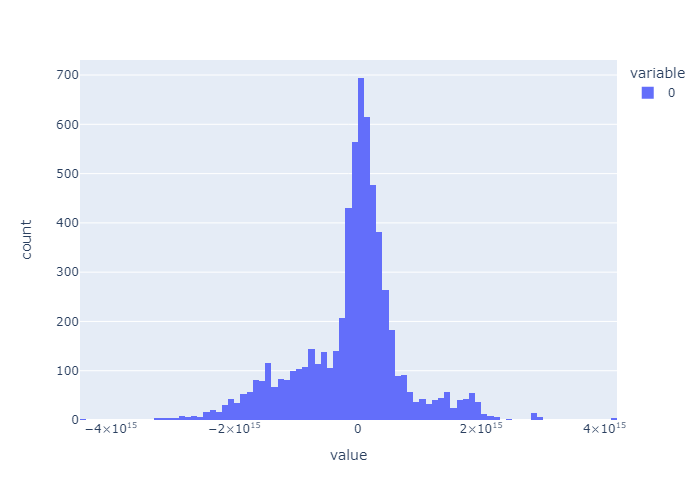

In [67]:
import plotly.express as px
fig_df = df['actual_arrival_utc']-df['estimated_arrival_utc']
fig = px.histogram(fig_df)
fig.show('png')

In [68]:
#normal distri with a little bit of positive skew

In [69]:
#import plotly.grap_objects as go
#fig = go.Figure()
#fig.add_trace(x=)

In [70]:
#ATA-pETA follows normal distri
fig_df

3965   -19 days +06:56:54.110631
3901   -19 days +06:15:08.245621
3744   -19 days +07:28:50.988340
3810   -19 days +03:30:14.082158
3706   -20 days +20:17:24.910629
                  ...           
10       15 days 09:17:01.884959
11       15 days 05:42:47.334183
12       48 days 01:47:26.465745
8        15 days 11:25:44.085311
7        15 days 09:18:54.575584
Length: 6347, dtype: timedelta64[ns]

In [71]:
from scipy.stats import norm
import seaborn as sns

In [72]:
mn = np.mean(fig_df)
std = np.std(fig_df)

C:\Users\prash\AppData\Local\Temp\ipykernel_22944\2457056392.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

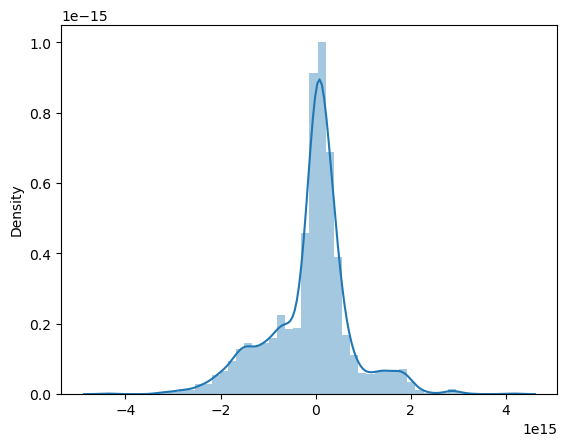

In [73]:
sns.distplot(fig_df)

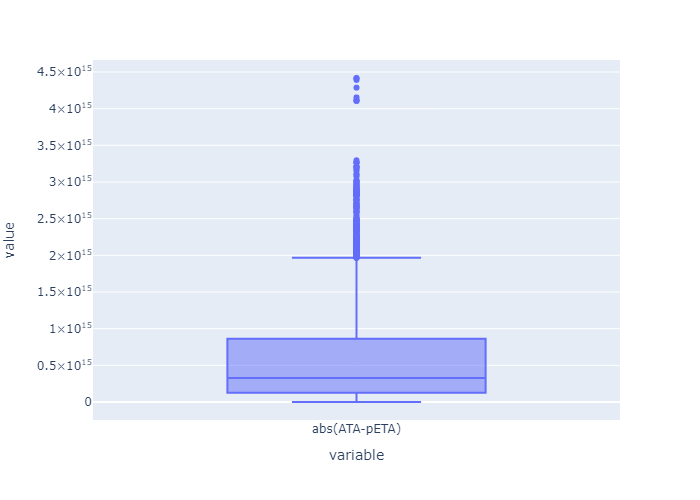

In [74]:
fig = px.box(df['abs(ATA-pETA)'])
fig.show('png')

In [75]:
#import plotly.figure_factory as ff
#group_labels = ['distplot']
#fig = ff.create_distplot(fig_df,group_labels)
#fig.show()

In [76]:
#

In [77]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
diff_ATApETA = df['actual_arrival_utc']-df['estimated_arrival_utc']

In [79]:
#df['ATA+MAE'] = df['actual_arrival_utc']+ MAE
#df['ATA-MAE'] = df['actual_arrival_utc']- MAE

In [80]:
n = df.shape[0]
n

6347

In [81]:
OTPA = df[(df['estimated_arrival_utc'] > df['ATA-MAE']) & (df['estimated_arrival_utc'] < df['ATA+MAE'])].shape[0]*100/n
OTPA

KeyError: 'ATA-MAE'

In [ ]:
#otps distribution for different ranges have different accuracy

In [82]:
from sklearn.metrics import median_absolute_error

In [83]:
#median better than mean to avoid outliers

In [84]:
#prediction view and actual view with different method to calc days ahead but will have come at x and y 

In [85]:
df =df.reset_index(drop=True)
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA)
0,5048637f-bf9a-483e-bef7-12afda292a98,2021-09-04 17:02:36.717531+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:33:12.889369+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:03:05.889369
1,70f35ce9-0a80-459d-882f-8c4fe7652060,2021-09-04 07:35:04+00:00,2021-09-20 02:00:00+00:00,2021-09-20 11:14:58.754379+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:44:51.754379
2,524482f2-dd6e-4fa6-b855-82d798c820e8,2021-09-03 14:04:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:01:16.011660+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 16:31:09.011660
3,a4977e62-0316-4dd3-9bb2-8261c2517dff,2021-09-03 19:58:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 13:59:52.917842+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 20:29:45.917842
4,9c563234-3438-4837-aeb3-b67fd19578de,2021-09-03 09:45:25+00:00,2021-09-20 02:00:00+00:00,2021-09-20 21:12:42.089371+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,19 days 03:42:35.089371
...,...,...,...,...,...,...,...,...,...
6342,767b25e3-9e13-43f5-845e-6f92e7c638bd,2021-07-07 12:26:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 18:51:32.805041+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 09:17:01.884959
6343,fc64b759-b726-4972-8d2b-58df28aa88c2,2021-07-07 14:02:29+00:00,2021-09-15 06:00:00+00:00,2021-09-08 22:25:47.355817+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 05:42:47.334183
6344,e68fef04-1886-47e7-8e53-eeabc54aebb4,2021-07-07 22:02:29+00:00,2021-09-15 06:00:00+00:00,2021-08-07 02:21:08.224255+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,48 days 01:47:26.465745
6345,fd452fcc-edb7-48a4-b1af-2969f2b31bdd,2021-07-06 21:41:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 16:42:50.604689+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,80 days,15 days 11:25:44.085311


In [86]:
#Prediction View X_days = days ahead = (pETA - pTimestamp)
 
df['PV_days_ahead= pETA-timestamp']=df['estimated_arrival_utc']-df['timestamp_utc']


In [87]:
df[df['abs(ATA-pETA)']== 0]

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA),PV_days_ahead= pETA-timestamp


In [88]:
#MAE is right
#otpa need different ranges which could be get from normal distri curve with 1 std deviation on one side and calc accuracy
#prediction view x = days ahead
#one graph with both estimated and actual line graph
#graph where y = accuracy and otpa vs x = days ahead for prediction view and actual view


In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

In [90]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
#cf.go_offline()


In [91]:
import plotly.graph_objects as go
px.line(df['diff_ATA_ETA'] .abs())

KeyError: 'diff_ATA_ETA'

In [92]:
#diff_ATApETA =
df['diff_ATA_ETA'] = df['actual_arrival_utc'].dt.date-df['estimated_arrival_utc'].dt.date

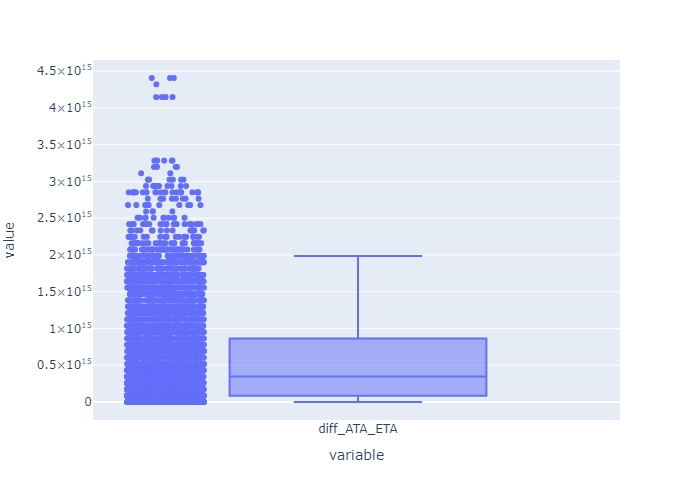

In [93]:
fig = px.box(df['diff_ATA_ETA'].abs(), points = 'all') # absolute value difference between actual and estimated in days skewing towards zero , need to see more

fig.show('png')

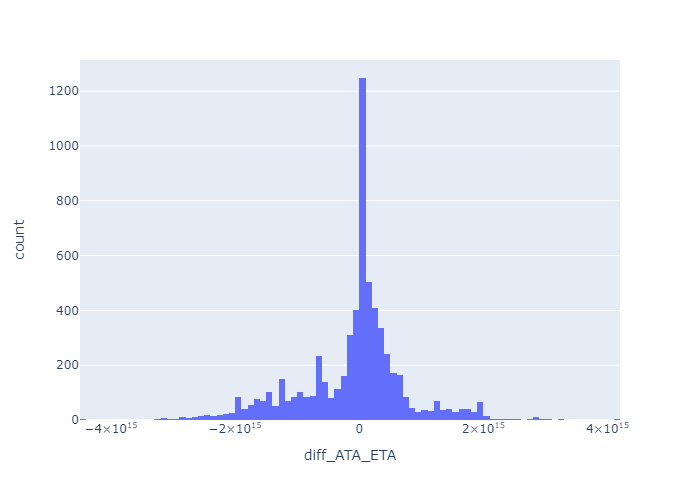

In [94]:
fig = px.histogram(df, x='diff_ATA_ETA')
fig.show('png')

C:\Users\prash\AppData\Local\Temp\ipykernel_22944\4037887601.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='diff_ATA_ETA', ylabel='Density'>

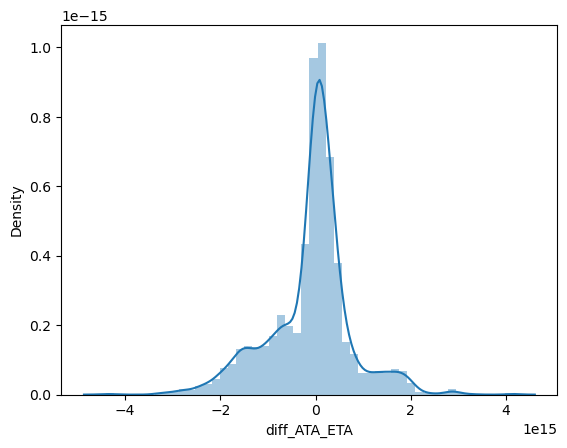

In [95]:
sns.distplot(df['diff_ATA_ETA'])


In [96]:
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA),PV_days_ahead= pETA-timestamp,diff_ATA_ETA
0,5048637f-bf9a-483e-bef7-12afda292a98,2021-09-04 17:02:36.717531+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:33:12.889369+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:03:05.889369,15 days 17:30:36.171838,-19 days
1,70f35ce9-0a80-459d-882f-8c4fe7652060,2021-09-04 07:35:04+00:00,2021-09-20 02:00:00+00:00,2021-09-20 11:14:58.754379+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:44:51.754379,16 days 03:39:54.754379,-19 days
2,524482f2-dd6e-4fa6-b855-82d798c820e8,2021-09-03 14:04:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:01:16.011660+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 16:31:09.011660,16 days 19:57:11.011660,-19 days
3,a4977e62-0316-4dd3-9bb2-8261c2517dff,2021-09-03 19:58:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 13:59:52.917842+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 20:29:45.917842,16 days 18:01:47.917842,-19 days
4,9c563234-3438-4837-aeb3-b67fd19578de,2021-09-03 09:45:25+00:00,2021-09-20 02:00:00+00:00,2021-09-20 21:12:42.089371+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,19 days 03:42:35.089371,17 days 11:27:17.089371,-19 days
...,...,...,...,...,...,...,...,...,...,...,...
6342,767b25e3-9e13-43f5-845e-6f92e7c638bd,2021-07-07 12:26:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 18:51:32.805041+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 09:17:01.884959,63 days 06:25:02.805041,16 days
6343,fc64b759-b726-4972-8d2b-58df28aa88c2,2021-07-07 14:02:29+00:00,2021-09-15 06:00:00+00:00,2021-09-08 22:25:47.355817+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 05:42:47.334183,63 days 08:23:18.355817,16 days
6344,e68fef04-1886-47e7-8e53-eeabc54aebb4,2021-07-07 22:02:29+00:00,2021-09-15 06:00:00+00:00,2021-08-07 02:21:08.224255+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,48 days 01:47:26.465745,30 days 04:18:39.224255,48 days
6345,fd452fcc-edb7-48a4-b1af-2969f2b31bdd,2021-07-06 21:41:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 16:42:50.604689+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,80 days,15 days 11:25:44.085311,63 days 19:01:20.604689,16 days


In [97]:
df['PV_days_ahead= pETA-ptimestamp']=df['estimated_arrival_utc'].dt.date-df['timestamp_utc'].dt.date

In [98]:
df['port_code'].value_counts()

CNSHG    526
INNSA    431
INMUN    414
SGSIN    309
CNYTN    300
        ... 
EGALY      9
AEJEA      7
MYTPP      6
BEANR      3
MXPGO      1
Name: port_code, Length: 67, dtype: int64

In [99]:
df.groupby(df['port_code'])['abs(ATA-pETA)'].mean().sort_values()

port_code
MTMAR    0 days 04:14:19.388921875
MXPGO       0 days 12:26:42.611614
AEJEA    0 days 15:57:35.212512714
USTPA    0 days 18:05:06.547852611
USMOB    0 days 20:45:42.440215090
                   ...            
PTSIE   11 days 02:23:08.575950538
USPHL   11 days 11:55:08.155693730
ESLPA   13 days 08:25:07.568844201
PAMIT   19 days 01:13:55.377446555
FRFOS   20 days 11:34:41.305484500
Name: abs(ATA-pETA), Length: 67, dtype: timedelta64[ns]

In [100]:
df.duplicated().sum()

4

In [101]:
df['imo'].value_counts().sort_values()

9316347      1
9450935      3
9393319      6
9110377      7
9238882      7
          ... 
9632129    252
9777216    264
9606338    267
9619969    344
9393307    459
Name: imo, Length: 68, dtype: int64

In [102]:
#df['scheduled_arrival_utc'].dt.month.value_counts()

In [103]:
df['actual_arrival_utc'].dt.month.value_counts()

9    5938
8     409
Name: actual_arrival_utc, dtype: int64

In [104]:
df['estimated_arrival_utc'].dt.month.value_counts()

9     4842
8      846
10     653
11       6
Name: estimated_arrival_utc, dtype: int64

In [105]:
#df['Scheduled_month'] = df['scheduled_arrival_utc'].dt.month

In [106]:
df

,vessel_live_info_id,timestamp_utc,scheduled_arrival_utc,estimated_arrival_utc,imo,port_code,actual_arrival_utc,AV_days_ahead= ATA-ptimestamp,abs(ATA-pETA),PV_days_ahead= pETA-timestamp,diff_ATA_ETA,PV_days_ahead= pETA-ptimestamp
0,5048637f-bf9a-483e-bef7-12afda292a98,2021-09-04 17:02:36.717531+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:33:12.889369+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:03:05.889369,15 days 17:30:36.171838,-19 days,16 days
1,70f35ce9-0a80-459d-882f-8c4fe7652060,2021-09-04 07:35:04+00:00,2021-09-20 02:00:00+00:00,2021-09-20 11:14:58.754379+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-3 days,18 days 17:44:51.754379,16 days 03:39:54.754379,-19 days,16 days
2,524482f2-dd6e-4fa6-b855-82d798c820e8,2021-09-03 14:04:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 10:01:16.011660+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 16:31:09.011660,16 days 19:57:11.011660,-19 days,17 days
3,a4977e62-0316-4dd3-9bb2-8261c2517dff,2021-09-03 19:58:05+00:00,2021-09-20 02:00:00+00:00,2021-09-20 13:59:52.917842+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,18 days 20:29:45.917842,16 days 18:01:47.917842,-19 days,17 days
4,9c563234-3438-4837-aeb3-b67fd19578de,2021-09-03 09:45:25+00:00,2021-09-20 02:00:00+00:00,2021-09-20 21:12:42.089371+00:00,9316373,SGSIN,2021-09-01 17:30:07+00:00,-2 days,19 days 03:42:35.089371,17 days 11:27:17.089371,-19 days,17 days
...,...,...,...,...,...,...,...,...,...,...,...,...
6342,767b25e3-9e13-43f5-845e-6f92e7c638bd,2021-07-07 12:26:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 18:51:32.805041+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 09:17:01.884959,63 days 06:25:02.805041,16 days,63 days
6343,fc64b759-b726-4972-8d2b-58df28aa88c2,2021-07-07 14:02:29+00:00,2021-09-15 06:00:00+00:00,2021-09-08 22:25:47.355817+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,15 days 05:42:47.334183,63 days 08:23:18.355817,16 days,63 days
6344,e68fef04-1886-47e7-8e53-eeabc54aebb4,2021-07-07 22:02:29+00:00,2021-09-15 06:00:00+00:00,2021-08-07 02:21:08.224255+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,79 days,48 days 01:47:26.465745,30 days 04:18:39.224255,48 days,31 days
6345,fd452fcc-edb7-48a4-b1af-2969f2b31bdd,2021-07-06 21:41:30+00:00,2021-09-15 06:00:00+00:00,2021-09-08 16:42:50.604689+00:00,9332884,USHOU,2021-09-24 04:08:34.690000+00:00,80 days,15 days 11:25:44.085311,63 days 19:01:20.604689,16 days,64 days


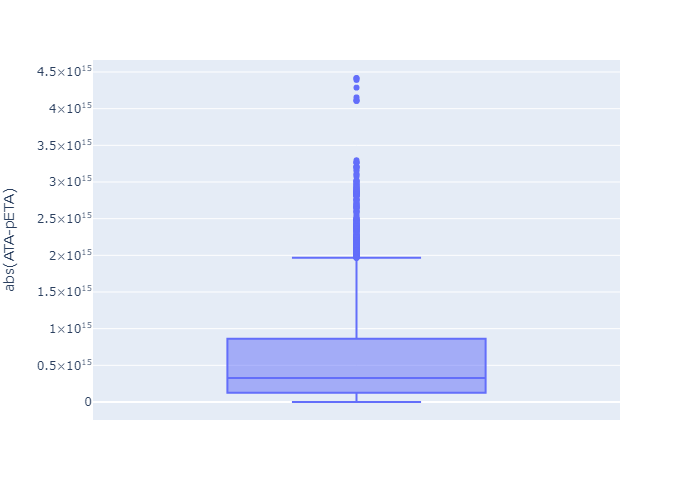

In [107]:
#visualization
import plotly.express as px
import numpy as np

fig = px.box(df, y="abs(ATA-pETA)")
fig.show('png')

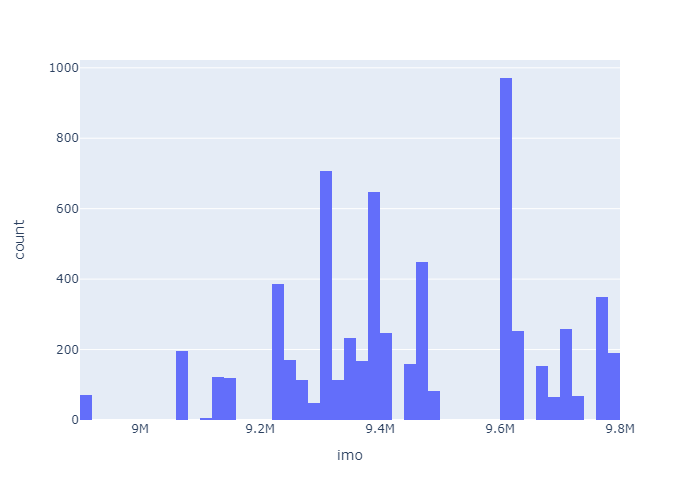

In [108]:
fig = px.histogram(df, x="imo")
fig.show('png')

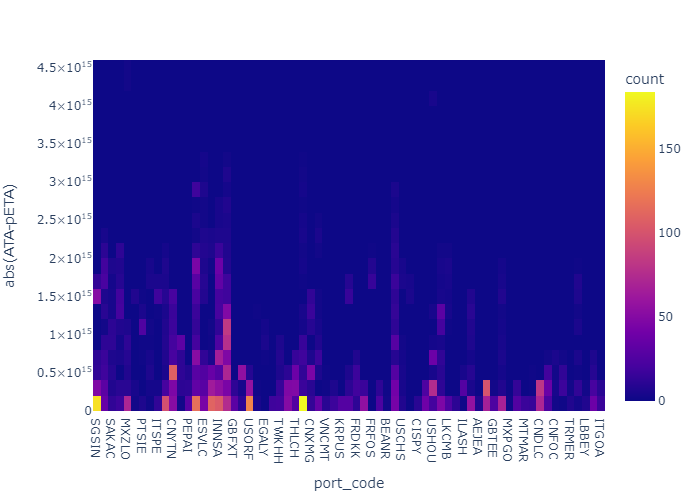

In [109]:
fig = px.density_heatmap(df, x="port_code", y="abs(ATA-pETA)")
fig.show('png')

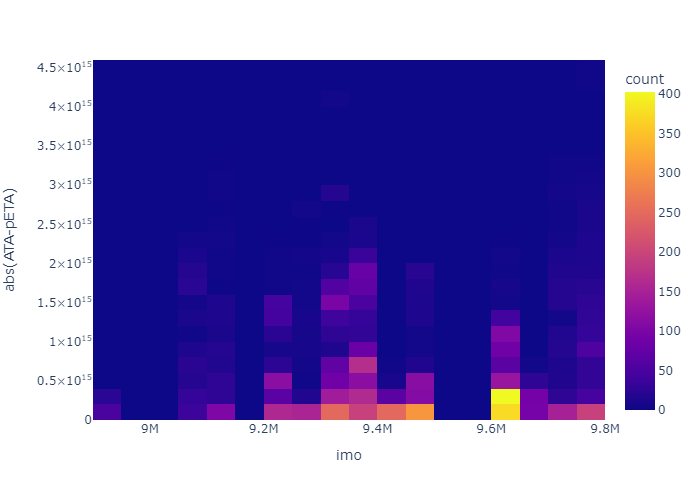

In [110]:
fig = px.density_heatmap(df, x="imo", y="abs(ATA-pETA)")
fig.show('png')

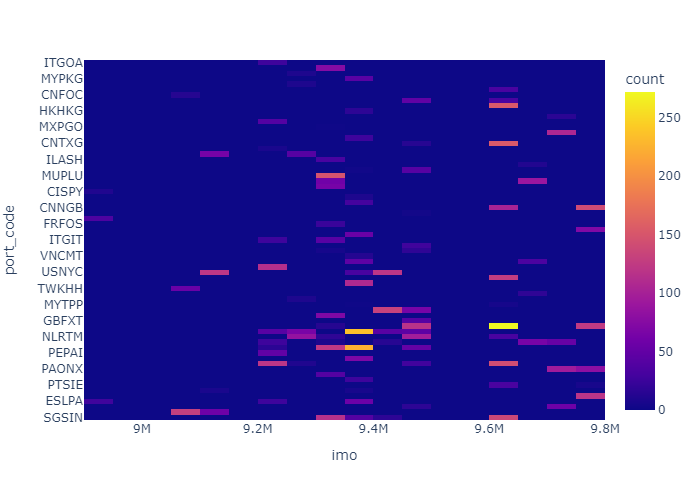

In [111]:
fig = px.density_heatmap(df, x="imo", y="port_code")
fig.show('png')

In [112]:
df["actual_arrival_utc_date"=="2021-09-07T11:25:09+00:00"]

KeyError: False

In [113]:
df.groupby(["imo"])['abs(ATA-pETA)'].mean().sort_values()

imo
9720287    0 days 04:14:19.388921875
9247766    0 days 09:21:03.983381812
9316347       0 days 12:26:42.611614
9238882    0 days 15:57:35.212512714
9440784    0 days 16:42:45.879859987
                     ...            
9110377   17 days 11:58:42.761535142
9372860   17 days 22:36:37.021350607
9339272   18 days 02:10:26.494131277
9349875   18 days 02:42:47.155431615
9720457   25 days 05:09:45.144726519
Name: abs(ATA-pETA), Length: 68, dtype: timedelta64[ns]

In [114]:
df.groupby(["port_code"])['abs(ATA-pETA)'].mean().sort_values()

port_code
MTMAR    0 days 04:14:19.388921875
MXPGO       0 days 12:26:42.611614
AEJEA    0 days 15:57:35.212512714
USTPA    0 days 18:05:06.547852611
USMOB    0 days 20:45:42.440215090
                   ...            
PTSIE   11 days 02:23:08.575950538
USPHL   11 days 11:55:08.155693730
ESLPA   13 days 08:25:07.568844201
PAMIT   19 days 01:13:55.377446555
FRFOS   20 days 11:34:41.305484500
Name: abs(ATA-pETA), Length: 67, dtype: timedelta64[ns]

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[timedelta64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[timedelta64]'>)

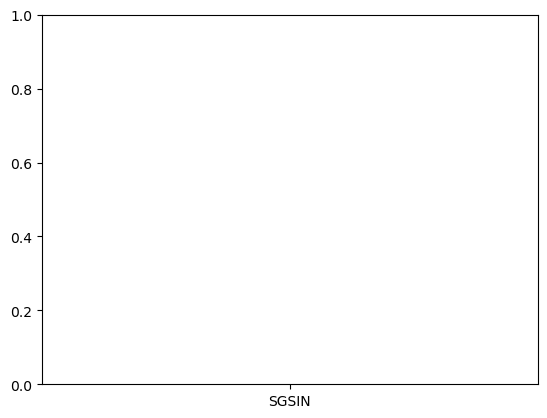

In [115]:
import matplotlib.pyplot as plt
df.plot.scatter(x="port_code", y="abs(ATA-pETA)")
plt.show()

In [ ]:
df['OTPA'] = df['ATA']-df['pETA'].value_counts()

In [ ]:
df

In [ ]:
df['estimated_arrival_utc']+ 